## Multidimensional Discrimination Synthetic Data Generation

In [1]:

%load_ext autoreload
%autoreload 

import os
import sys
import pandas as pd
sys.path.append(os.path.join('..', 'src'))

import plots
# from plots import thresholding
from synthetic_generator import SyntheticLoanDataGenerator


### Equations for Data Generation
Assume that $G=1 \implies \text{female}$, and $R=1 \implies \text{black}$. Hence the protected group would be $\{G=1, R=1\}$ and the unprotected group would be $\{G=0, R=0\}$.
$$
\begin{aligned}
\textbf{Root nodes:} \\
f_G: & \quad G = U_{G}, \quad U_{G} \sim \operatorname{Bernoulli}(0.5), \\[1ex]
f_R: & \quad R = U_{R}, \quad U_{R} \sim \operatorname{Bernoulli}(0.5), \\
\textbf{Covariates:} \\
\text{(Discrimination with negative effect)} \\
E &= -0.5 + \lambda_E \Bigl(\theta_G G + \theta_R R + \theta_{GR} (G \times R)\Bigr) \\
  & \quad + U_E, \quad U_E \sim \mathcal{N}(0, 0.25), \\
I &= -4 + 3E + \lambda_I \Bigl(\beta_G G + \beta_R R + \beta_{GR} (G \times R)\Bigr) \\
  & \quad + U_I, \quad U_I \sim \mathcal{N}(0, 4), \\
S &= -4 + 1.5\,\mathbb{1}\{I > 0\}\, I + U_S, \quad U_S \sim \mathcal{N}(0, 5), \\

L &= 1 - \beta_I I - \beta_S S +   \lambda_L \Bigl(\rho_G G + \rho_R R + \rho_{GR} (G \times R)\Bigr) \\
  & \quad + U_L, \quad U_L \sim \mathcal{N}(0, 10), \quad \beta \in \{0, 0.03\}, \\[1ex]
\text{(Discrimination with positive effect)} \\
D &= -1 - \beta_I I + L + \lambda_D \Bigl(\kappa_G G + \kappa_R R + \kappa_{GR} (G \times R)\Bigr) \\
  & \quad + U_D, \quad U_D \sim \mathcal{N}(0, 9), \\
\textbf{Outcome:} \\
Y &= \mathbb{1}\Bigl\{
\sigma\Bigl(15+ \delta (-L - D) + 0.3 (I + S + \alpha IS) \Bigr) \\
  & \quad \geq 0.5 + \gamma \Bigl(1- \lambda_Y\Bigl(\nu_G G + \nu_R R + \nu_{GR} (G \times R)\Bigr)\Bigr)
\Bigr\}, \\

\end{aligned}
$$


#### Preset General Values

In [2]:
sample_size = 10000
random_seed = 42
prob_gender = 0.5
prob_race = 0.5
beta_S = 0.6
beta_I = 0.8
beta = 0.03 # account influence of I, S in L
gamma = 0.10 # if set to 0 then no effect from sensitive attributes, 0.15
# delta = 0.75  # influence of L, D in Y
delta = 0.45
eta = 2.0
plot_intersectional=True

### Case One: No Discrimination

In this case, none of the sensitive attributes influence the treatment nor the outcome, $\lambda$ controls the overall effect of the discrimination across all features.

/Users/kanubalad/Desktop/Saarland/PhD_Research/PythonCodes/AIES25/On-the-Misalignment-Between-Legal-Notions-and-Statistical-Metrics-of-Intersectional-Fairness/Notebooks/../src/plots.py:147: UserWarning: The figure layout has changed to tight
  fig.tight_layout()
/Users/kanubalad/Desktop/Saarland/PhD_Research/PythonCodes/AIES25/On-the-Misalignment-Between-Legal-Notions-and-Statistical-Metrics-of-Intersectional-Fairness/Notebooks/../src/plots.py:161: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


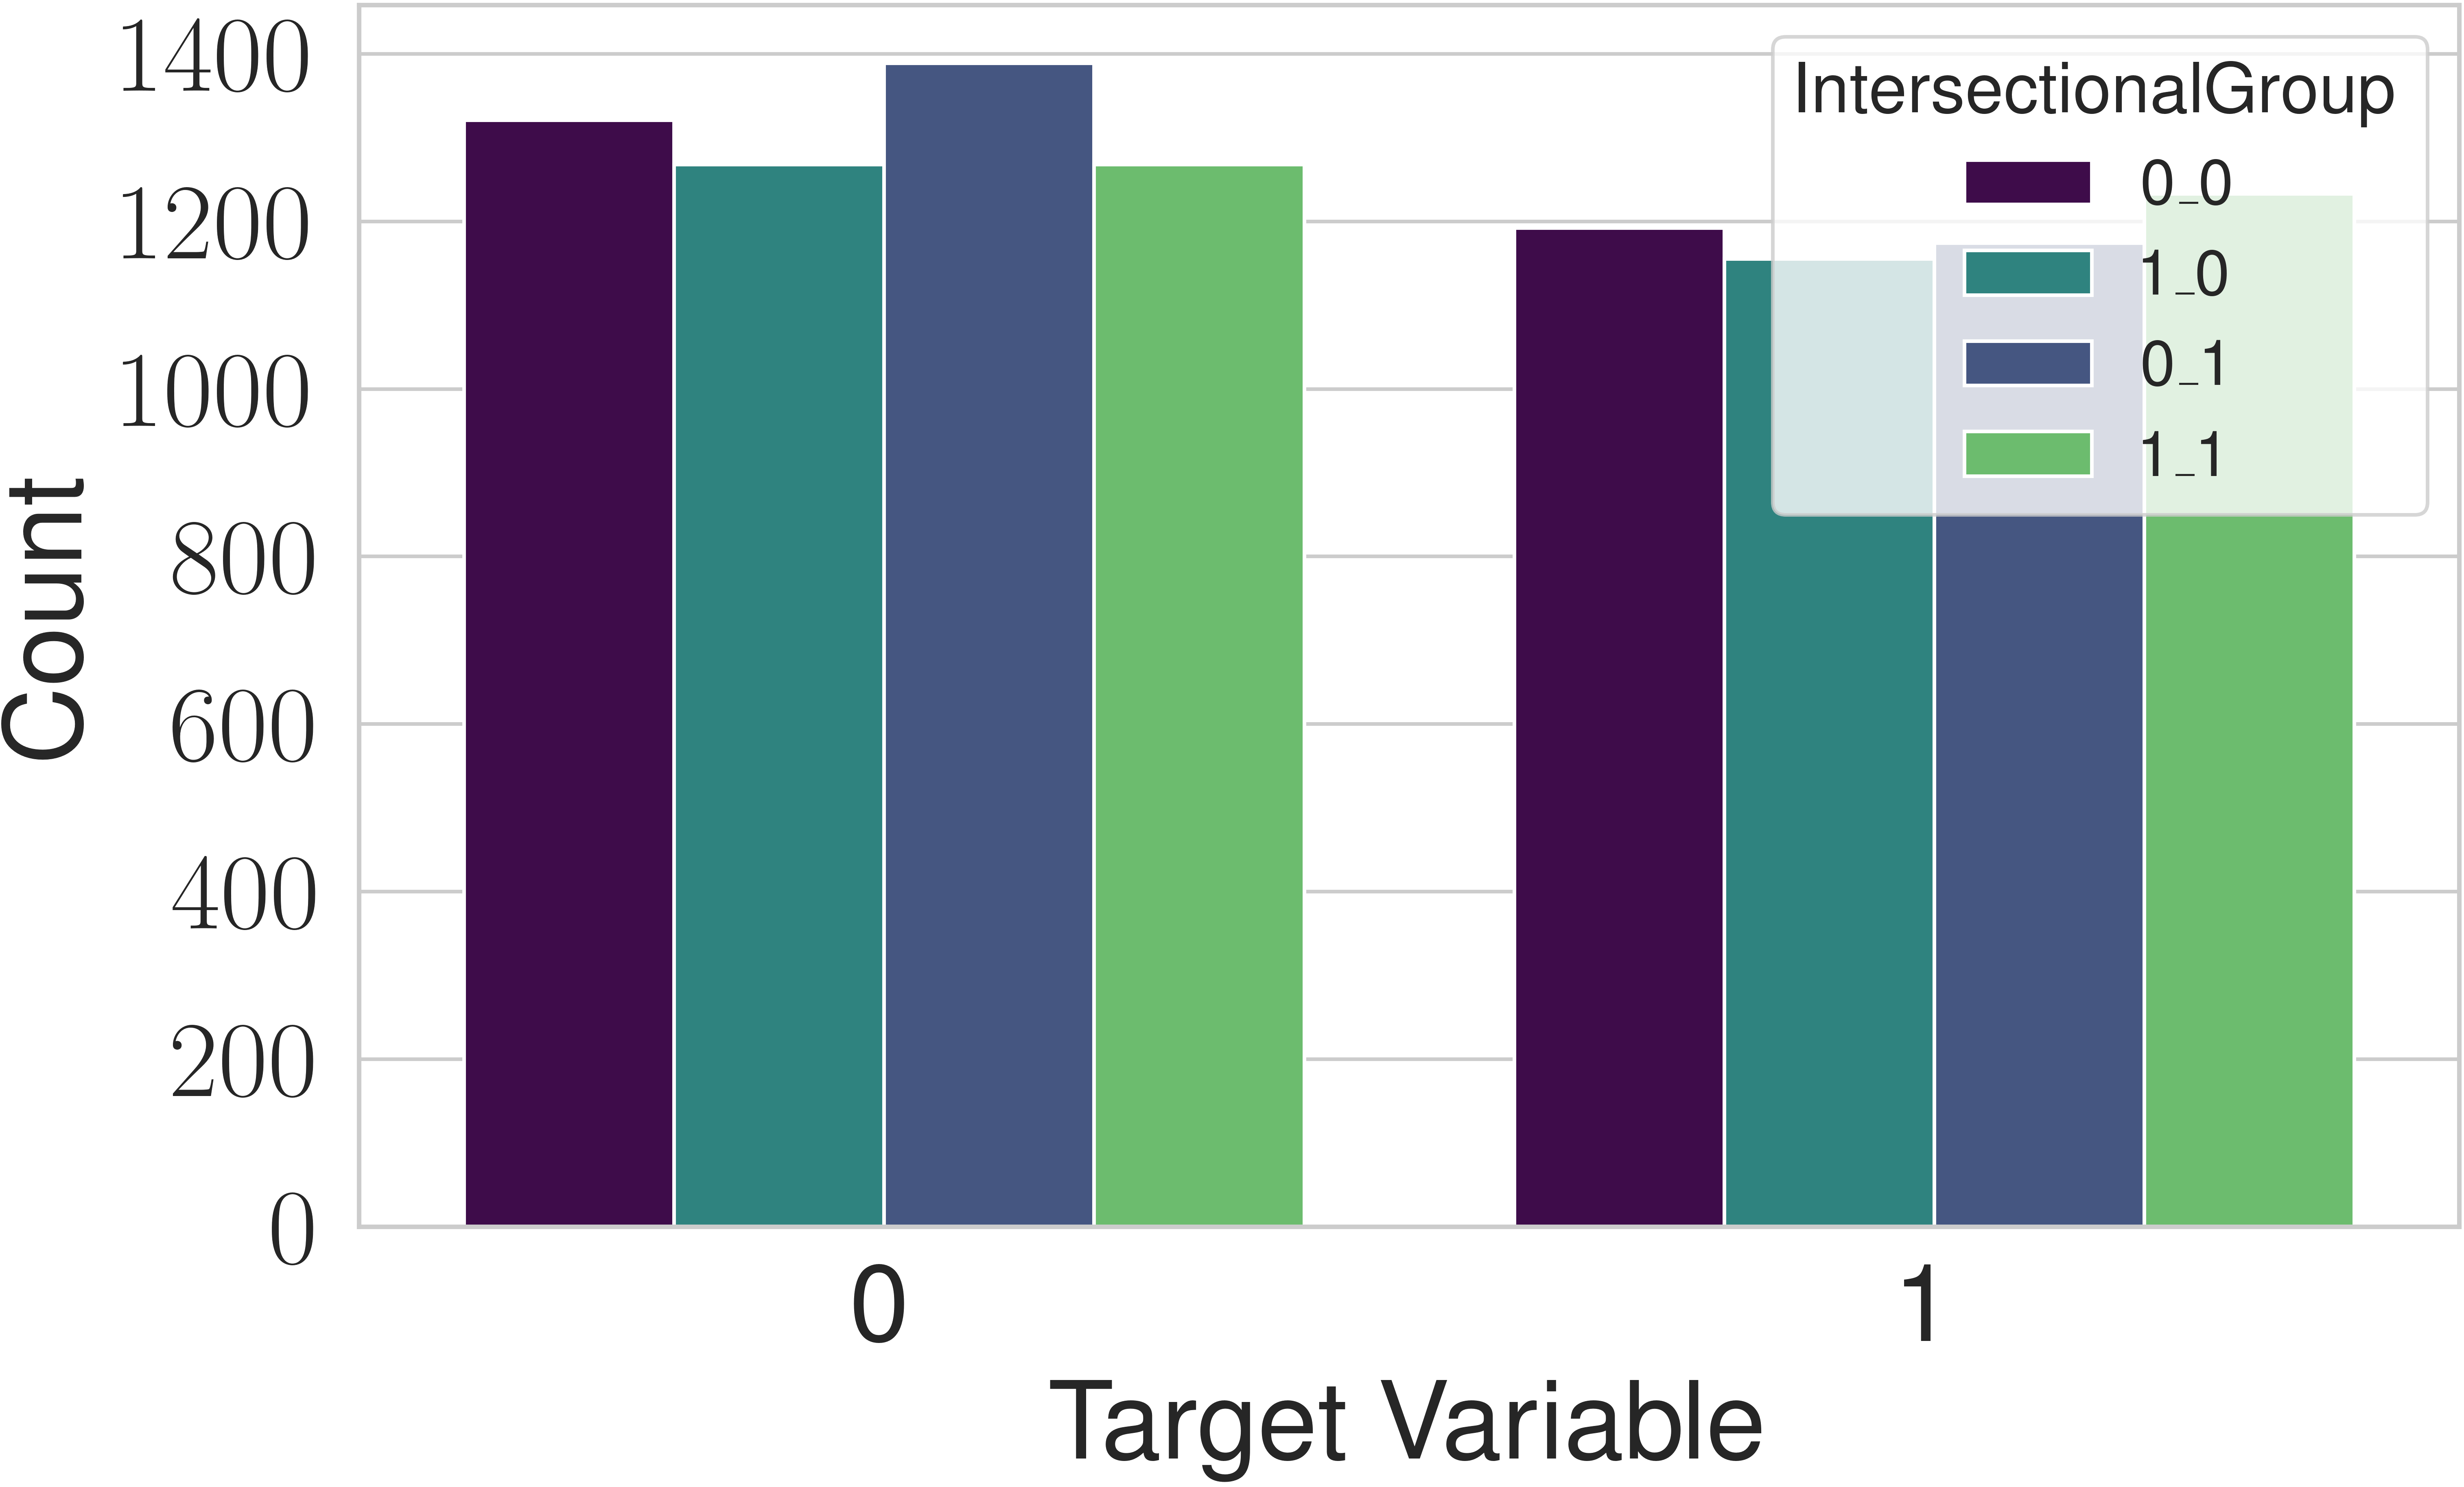

🔍 Outcome disparity by Gender:
Gender
0    0.46612
1    0.48497
Name: Y, dtype: float64
Disparity (max - min): 0.0189

🔍 Treatment disparity in LoanAmount by Gender:
Gender
0    7.84492
1    7.38621
Name: LoanAmount, dtype: float64
Disparity (max - min) in LoanAmount: 0.4587

🔍 Treatment disparity in Duration by Gender:
Gender
0    11.44050
1    10.94487
Name: Duration, dtype: float64
Disparity (max - min) in Duration: 0.4956



In [3]:
thetas = {'G': 0.0, 'R': 0.0, 'GR': 0.0} #education
beta_coef = {'G': 0.0,'R': 0.0,'GR': 0.0} #income
rhos = {'G': 0.0,'R': 0.0,'GR': 0.0}#loanamount
kappas = {'G': 0.0,'R': 0.0,'GR': 0.0}#duration
nus = {'G': 0.0,'R': 0.0,'GR': 0.0} #outcome
lambdas = {'E': 1.0,'I': 1.0,'L': 1.0,'D': -1.0,'Y': 1.0}

generator_no_discri = SyntheticLoanDataGenerator(sample_size=sample_size,
                                    random_seed=random_seed,prob_gender=prob_gender,
                                    prob_race=prob_race, beta=beta, beta_I = beta_I, 
                                    beta_S =beta_S, gamma=gamma,
                                    eta=eta,delta=delta,
                                    measure_bias_col='Gender',thetas=thetas,
                                    beta_coef=beta_coef,rhos=rhos,kappas=kappas,
                                    nus=nus,lambdas=lambdas)


# Generate the data
result_no_discr = generator_no_discri.synthetic_data_generation()
data_df_no_discr = result_no_discr['data_df']
data_df_no_discr.to_csv(f'../generated_data/no_discri_lambda_{sample_size}.csv', index=False)

# Measure discrimination and plot
generator_no_discri.measure_discrimination(data_df_no_discr, data_name = 'No Bias', plot=True, plot_intersectional=plot_intersectional)


/Users/kanubalad/Desktop/Saarland/PhD_Research/PythonCodes/AIES25/On-the-Misalignment-Between-Legal-Notions-and-Statistical-Metrics-of-Intersectional-Fairness/Notebooks/../src/plots.py:100: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


FileNotFoundError: [Errno 2] No such file or directory: './output_data/No Bias.pdf'

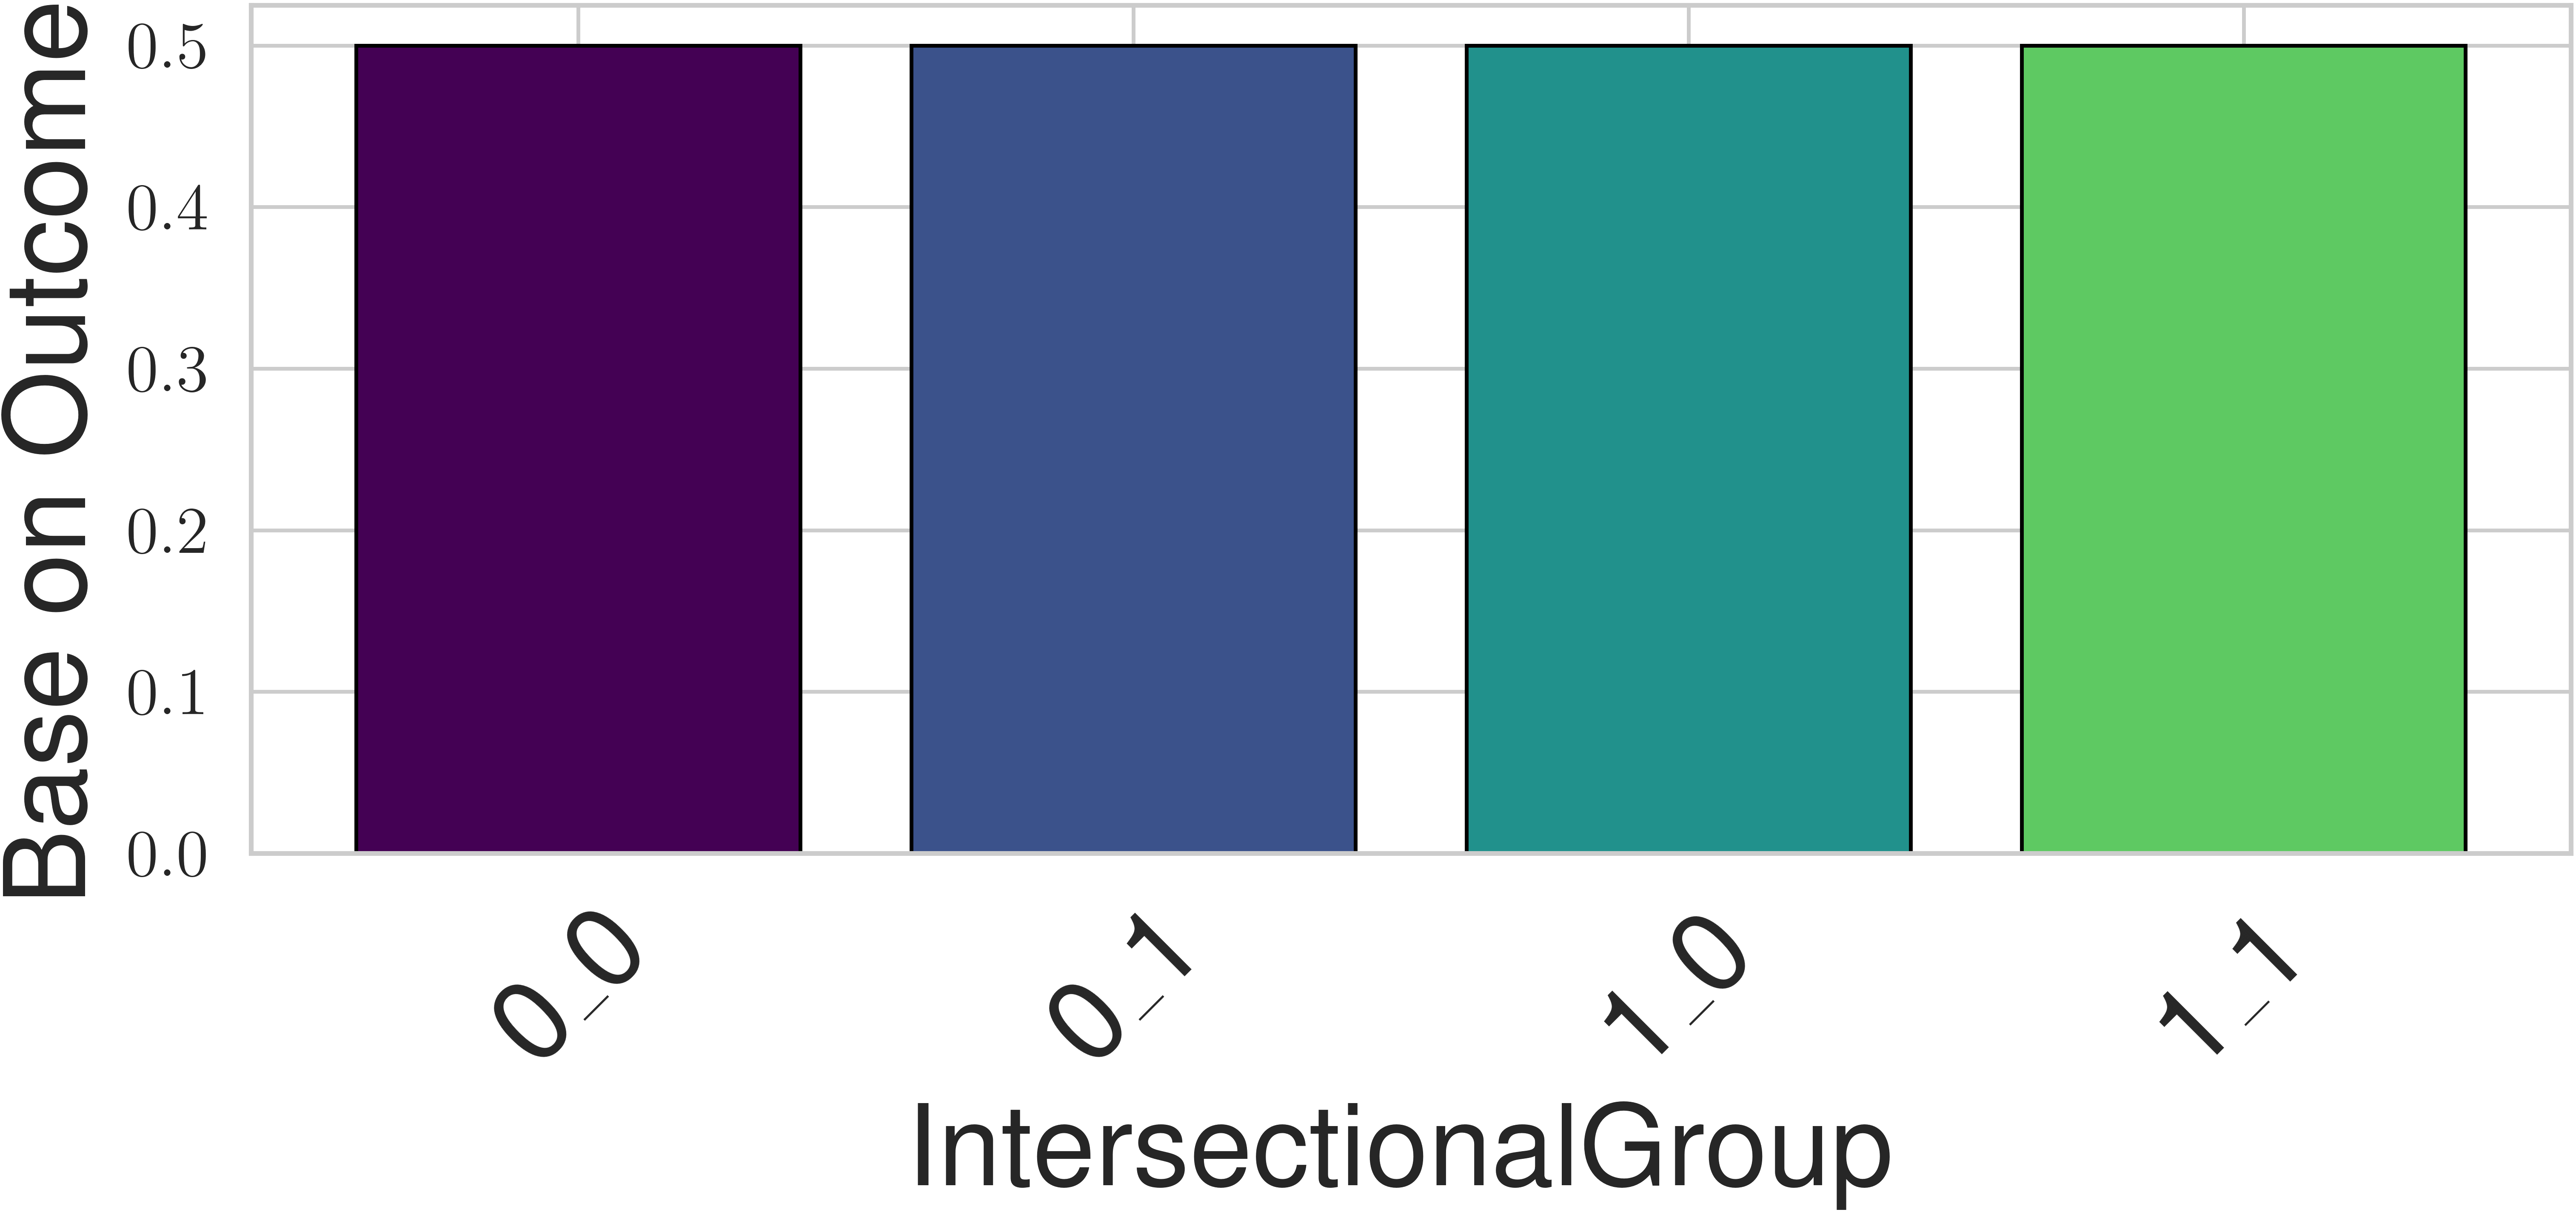

In [6]:
plots.thresholding(result_no_discr, group_by=None, data_name='No Bias')

### Case Two: Single Discrimination

Here, only one of the sensitive attributes influences the treatment and outcome.

In [ ]:
thetas = {'G': 0.25,'R': 0.0, 'GR': 0.0} # education
beta_coef = {'G': 4.0,'R': 0.0,'GR': 0.0} # income
rhos = {'G': 9.5,'R': 0.0,'GR': 0.0} # amount
kappas = {'G': 8.5,'R': 0.0,'GR': 0.0} # duration
nus = {'G': 2.0,'R': 0.0,'GR': 0.0} # outcome
lambdas = {'E': 1.0,'I': 1.0,'L': 1.0,'D': -1.0,'Y': 1.0}


generator_single_discri = SyntheticLoanDataGenerator(sample_size=sample_size,
                                    random_seed=random_seed,prob_gender=prob_gender,
                                    prob_race=prob_race, beta=beta, beta_I = beta_I, 
                                    beta_S =beta_S, gamma=gamma,
                                    eta=eta,delta=delta,
                                    measure_bias_col='Gender',thetas=thetas,
                                    beta_coef=beta_coef,rhos=rhos,kappas=kappas,
                                    nus=nus,lambdas=lambdas)


# Generate the data
result_single_discr = generator_single_discri.synthetic_data_generation()
data_df_single_discr = result_single_discr['data_df']
data_df_single_discr.to_csv(f'synthetic_data/single_discri_tg_{sample_size}.csv',index=False)


# Measure discrimination and plot
generator_single_discri.measure_discrimination(data_df_single_discr,data_name = 'Single Axis Bias', plot=True, plot_intersectional=plot_intersectional)

In [ ]:
thresholding(result_single_discr, group_by=None, data_name='Single Axis Bias')

In [ ]:
# result_single_discr['thresholds']

### Case Three: Multiple Discrimination

Here, the sensitive attributes, i.e S and R, will need to influence the outcome and treatment, but then we should not have interaction between them.

In [ ]:
thetas = {'G': 0.20,'R': 0.25, 'GR': 0.0}#education
beta_coef = {'G': 4.0,'R': 3.7,'GR': 0.0}#income
rhos = {'G': 9.4,'R': 9.0,'GR': 0.0}#amount
kappas = {'G': 8.0,'R': 8.3,'GR': 0.0}#duration
nus = {'G': 0.85,'R': 0.9,'GR': 0.0} # outcome

# nus = {'G': 0.05,'R': 0.1,'GR': 0.0} # outcome

lambdas = {'E': 1.0,'I': 1.0,'L': 1.0,'D': -1.0,'Y': 1.0}

generator_multiple_discri = SyntheticLoanDataGenerator(sample_size=sample_size,
                                    random_seed=random_seed,prob_gender=prob_gender,
                                    prob_race=prob_race, beta=beta, beta_I = beta_I, 
                                    beta_S =beta_S, gamma=gamma,
                                    eta=eta,delta=delta,
                                    measure_bias_col='Gender',thetas=thetas,
                                    beta_coef=beta_coef,rhos=rhos,kappas=kappas,
                                    nus=nus,lambdas=lambdas)


# Generate the data
result_multiple_discr = generator_multiple_discri.synthetic_data_generation()
data_df_multiple_discr = result_multiple_discr['data_df']
data_df_multiple_discr.to_csv(f'synthetic_data/multiple_discri_tg_{sample_size}.csv', index=False)


# Measure discrimination and plot
generator_multiple_discri.measure_discrimination(data_df_multiple_discr, data_name = 'Multiple Bias', plot=True, plot_intersectional=plot_intersectional)

In [ ]:
thresholding(result_multiple_discr, group_by=None, data_name='Multiple Bias')

### Case Four: Compounded Discrimination

Here, there’s an interaction between the sensitive attributes in influencing the treatment and the outcome.

In [ ]:
thetas = {'G': 0.20,'R': 0.23, 'GR': 0.25} # education
beta_coef = {'G': 3.9,'R': 3.5,'GR': 4.0} #income
rhos = {'G': 9.2,'R': 9.5,'GR': 10.0} #amount
kappas = {'G': 6.9,'R': 8.2,'GR': 8.8} #duration
nus = {'G': 1.0,'R': 0.9,'GR': 1.18} #outcome
lambdas = {'E': 1.0,'I': 1.0,'L': 1.0,'D': -1.0,'Y': 1.0}

generator_compounded_discri = SyntheticLoanDataGenerator(sample_size=sample_size,
                                    random_seed=random_seed,prob_gender=prob_gender,
                                    prob_race=prob_race, beta=beta, beta_I = beta_I, 
                                    beta_S =beta_S, gamma=gamma,
                                    eta=eta,delta=delta,
                                    measure_bias_col='Gender',thetas=thetas,
                                    beta_coef=beta_coef,rhos=rhos,kappas=kappas,
                                    nus=nus,lambdas=lambdas)


# Generate the data
result_intersectional_discr = generator_compounded_discri.synthetic_data_generation()
data_df_compunded_discr = result_intersectional_discr['data_df']
data_df_compunded_discr.to_csv(f'synthetic_data/compounded_discri_tg{sample_size}.csv', index=False)


# Measure discrimination and plot
generator_compounded_discri.measure_discrimination(data_df_compunded_discr, data_name = 'Compounded Bias', plot=True, plot_intersectional=plot_intersectional)

In [ ]:
thresholding(result_intersectional_discr, group_by=None, data_name='Compound Bias')

### Intersectionality

In [ ]:
thetas = {'G': 0.0,'R': 0.0, 'GR': 0.25} # education
beta_coef = {'G': 0.0,'R': 0.0,'GR': 4.0} # income
rhos = {'G': 0.0,'R': 0.0,'GR': 9.5} # amount
kappas = {'G': 0.0,'R': 0.0,'GR': 8.9} # duration
nus = {'G': 0.0,'R': 0.0,'GR': 2.0} # outcome
lambdas = {'E': 1.0,'I': 1.0,'L': 1.0,'D': -1.0,'Y': 1.0}


generator_intersectional_discri = SyntheticLoanDataGenerator(sample_size=sample_size,
                                    random_seed=random_seed,prob_gender=prob_gender,
                                    prob_race=prob_race, beta=beta, beta_I = beta_I, 
                                    beta_S =beta_S, gamma=gamma,
                                    eta=eta,delta=delta,
                                    measure_bias_col='Gender',thetas=thetas,
                                    beta_coef=beta_coef,rhos=rhos,kappas=kappas,
                                    nus=nus,lambdas=lambdas)


# Generate the data
result_intersectional_discr = generator_intersectional_discri.synthetic_data_generation()
data_intersectional_discr = result_intersectional_discr['data_df']
data_intersectional_discr.to_csv(f'synthetic_data/only_intersectional_discri_tg{sample_size}.csv', index=False)
generator_intersectional_discri.measure_discrimination(data_intersectional_discr, data_name = 'Intersectional Discrimination', plot=True, plot_intersectional=plot_intersectional)

In [ ]:
thresholding(result_no_multiple_intersectional_discr, group_by=None, data_name='Intersectional Discrimination')

In [ ]:
from plots import visualize_histograms

data_combined = pd.concat([data_df_no_discr.assign(Scenario='No Discrimination'),
                           data_df_single_discr.assign(Scenario='Single Discrimination'), 
                           data_df_multiple_discr.assign(Scenario='Multiple Discrimination'),
                           data_df_intersectional_discr.assign(Scenario='Intersectional Discrimination'),
                           data_only_multiple_intersectional_discr.assign(Scenario='Only Intersectional Discrimination')])

visualize_histograms(data_combined, data_name='Combined Dataset Scenarios', measure_bias_col='Scenario')



In [ ]:
import pandas as pd

def summarize_dataset(df, dataset_name, sensitive_attrs=('Gender', 'Race'), outcome_col='Y'):
    df = df.copy()

    # Create intersectional group column if it doesn't exist
    if 'Group' not in df.columns:
        df['Group'] = df[sensitive_attrs[0]].astype(str) + "_" + df[sensitive_attrs[1]].astype(str)

    # Group-level outcome summary
    summary = df.groupby('Group')[outcome_col].agg(['mean', 'count']).reset_index()
    summary.columns = ['Group', 'Y=1 Rate', 'Count']
    summary.insert(0, 'Dataset', dataset_name)

    # Covariate summary
    covariates = ['Education', 'Income', 'Savings', 'LoanAmount', 'Duration']
    cov_summary = df[covariates].describe().T.reset_index()
    cov_summary.columns = ['Covariate', 'Count', 'Mean', 'Std', 'Min', '25%', '50%', '75%', 'Max']
    cov_summary.insert(0, 'Dataset', dataset_name)

    return summary, cov_summary




dataset_dict = {'no bias': data_df_no_discr,
 'single bias': data_df_single_discr,
 'additive bias': data_df_multiple_discr,
 'compounded bias': data_df_intersectional_discr,
 'intersectional bias': data_only_multiple_intersectional_discr}


results = []
covariate_stats = []

for name, df in dataset_dict.items():
    g_summary, cov_summary = summarize_dataset(df, dataset_name=name)
    results.append(g_summary)
    covariate_stats.append(cov_summary)

full_group_summary = pd.concat(results)
full_cov_summary = pd.concat(covariate_stats)

